<h1 align='center' style='color:red'><em>Author : Sumit Mohod</em></h1>

---

<blockquote>Data Science and Business Analytics internship</blockquote>

<blockquote>The Sparks Foundation GRIP</blockquote>

<blockquote>Batch : December 2020</blockquote>

<blockquote>Task 3: Exploratory Data Analysis - Retail</blockquote>

---

<h1>Exploratory Data Analysis</h1>
<blockquote>
<b>Task 3</b> : In this task, I'll be performing some exploratory data analysis on the 'sample superstore data'.

<h4>Task objectives</h4>The following are the task objectives :
<ul>
<li>Performing EDA on the data to derive insights on how the profits can be increased.</li>
<li>Discovering the weak areas of the sales deparment in order to improve the sales.</li>
<li>Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers.</li>
</ul></blockquote>

In [1]:
# First I am importing the important libraries required in this notebook
import numpy as np 
import pandas as pd 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pywaffle import Waffle

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# let's import the dataset and have a look at our data.
superstore_df = pd.read_csv('SampleSuperstore.csv')

superstore_df.head()          # See the first 5 rows

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

## Data Exploration

In [3]:
print('The size of Dataframe is: ', superstore_df.shape)
print('\n')
superstore_df.info()

The size of Dataframe is:  (9994, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= superstore_df)

Total  Percent
Profit            0      0.0
Discount          0      0.0
Quantity          0      0.0
Sales             0      0.0
Sub-Category      0      0.0
Category          0      0.0
Region            0      0.0
Postal Code       0      0.0
State             0      0.0
City              0      0.0
Country           0      0.0
Segment           0      0.0
Ship Mode         0      0.0

As from above dataframe, my observation on missing data are: 
<UL>
   <li>There is no missing values in our dataset.
   <li>Therefore there is no need of data cleaning.
</UL>

<br>
Let's find <b>Statistical summary</b> of above data:

In [6]:
# Descriptive statistic 'numeric features' in the dataset
superstore_df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']].describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [7]:
# Descriptive statistic 'categorical features' in the dataset
superstore_df[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']].describe()

Ship Mode   Segment        Country           City       State  \
count             9994      9994           9994           9994        9994   
unique               4         3              1            531          49   
top     Standard Class  Consumer  United States  New York City  California   
freq              5968      5191           9994            915        2001   

       Region         Category Sub-Category  
count    9994             9994         9994  
unique      4                3           17  
top      West  Office Supplies      Binders  
freq     3203             6026         1523

In [8]:
# Let's explore unique values in some category
print("Unique values for feature 'Ship Mode': ", superstore_df['Ship Mode'].unique().tolist())
print("\nUnique values for feature 'Segment': ", superstore_df['Segment'].unique().tolist())
print("\nUnique values for feature 'Region': ", superstore_df['Region'].unique().tolist())
print("\nUnique values for feature 'Category': ", superstore_df['Category'].unique().tolist())
print("\nUnique values for feature 'Sub-Category':\n", superstore_df['Sub-Category'].unique().tolist())

Unique values for feature 'Ship Mode':  ['Second Class', 'Standard Class', 'First Class', 'Same Day']

Unique values for feature 'Segment':  ['Consumer', 'Corporate', 'Home Office']

Unique values for feature 'Region':  ['South', 'West', 'Central', 'East']

Unique values for feature 'Category':  ['Furniture', 'Office Supplies', 'Technology']

Unique values for feature 'Sub-Category':
 ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']


## Data Visualization

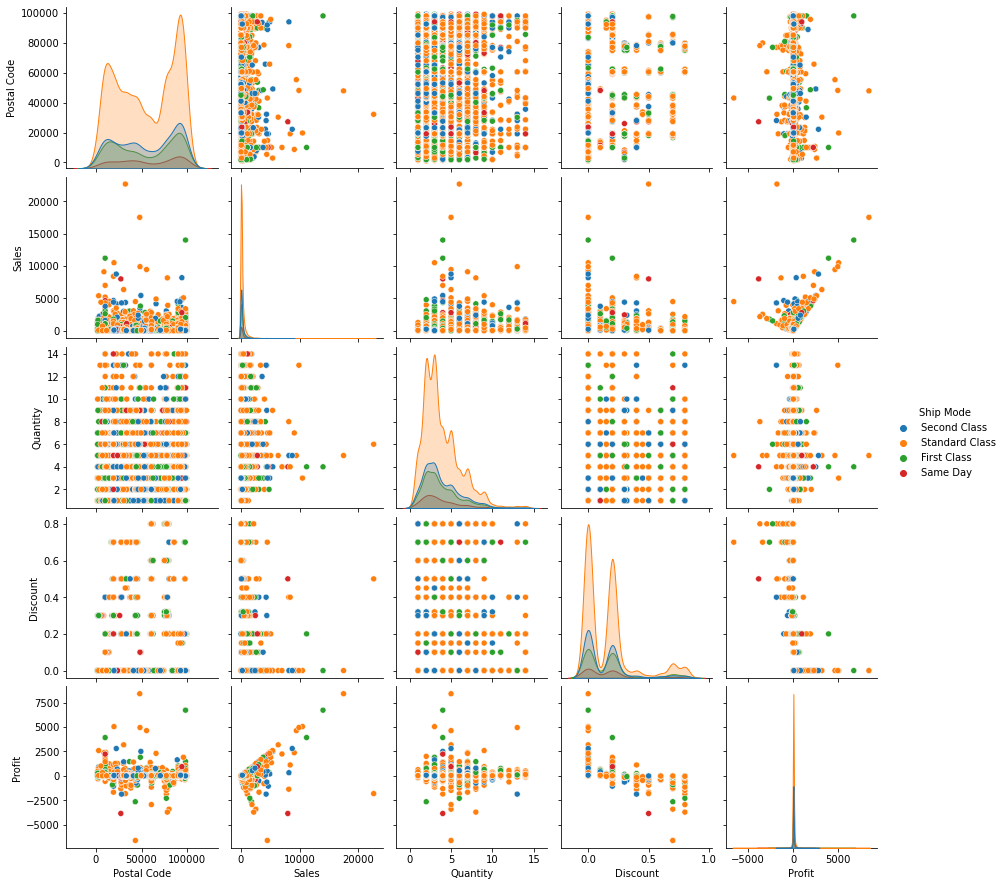

In [9]:
sns.pairplot(data= superstore_df, hue= 'Ship Mode')

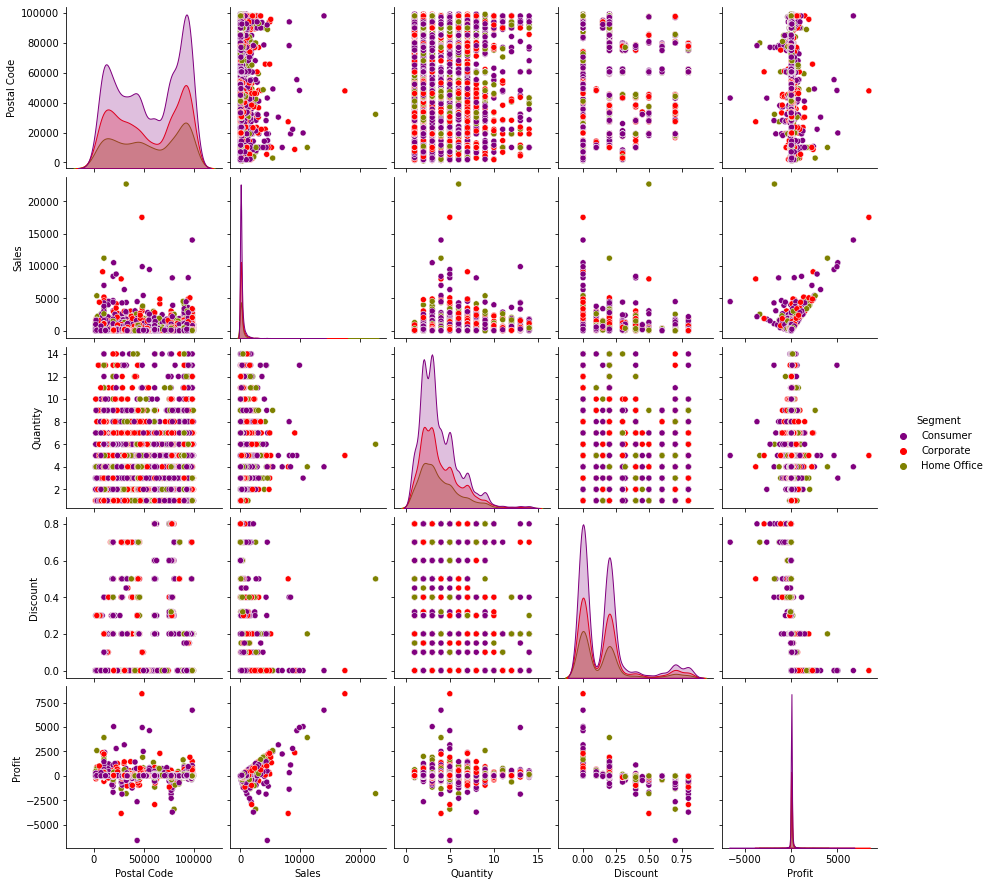

In [10]:
sns.pairplot(data= superstore_df, hue= 'Segment', palette= 'brg')

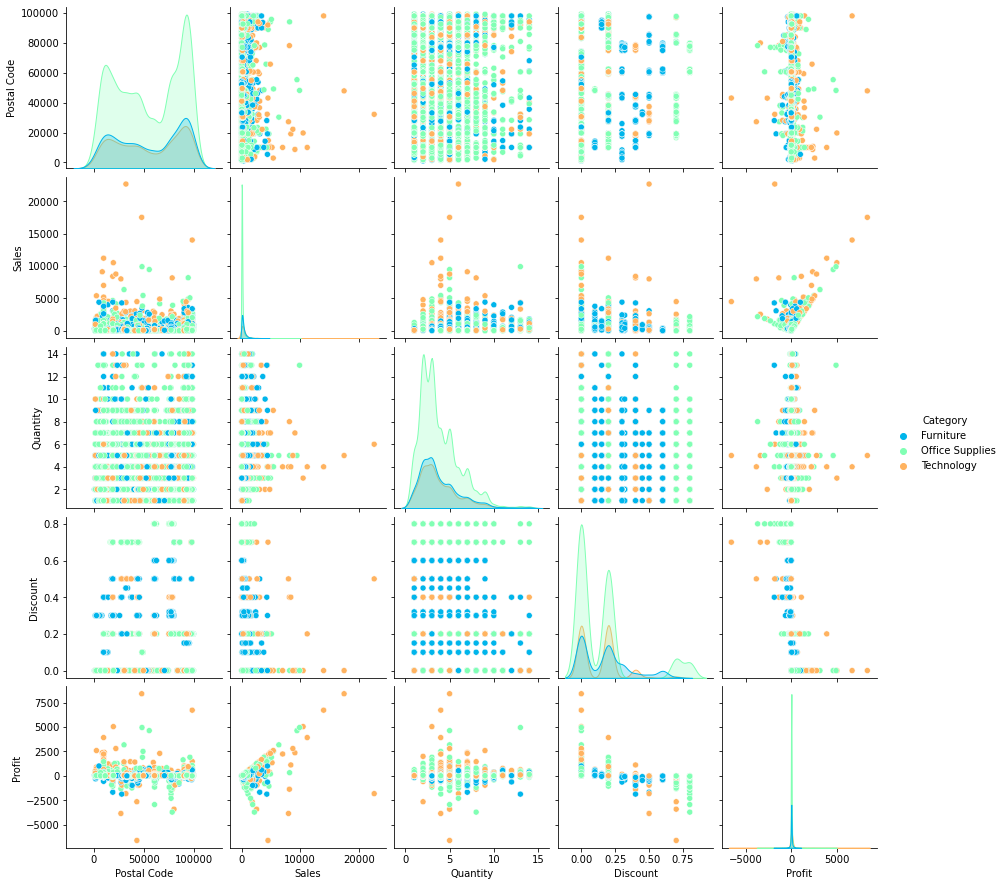

In [11]:
sns.pairplot(data= superstore_df, hue= 'Category', palette= 'rainbow')

In [12]:
order_sssg = superstore_df['Segment'].value_counts()
order_sssm = superstore_df['Ship Mode'].value_counts()
order_ssr = superstore_df['Region'].value_counts()
order_ssc = superstore_df['Category'].value_counts()

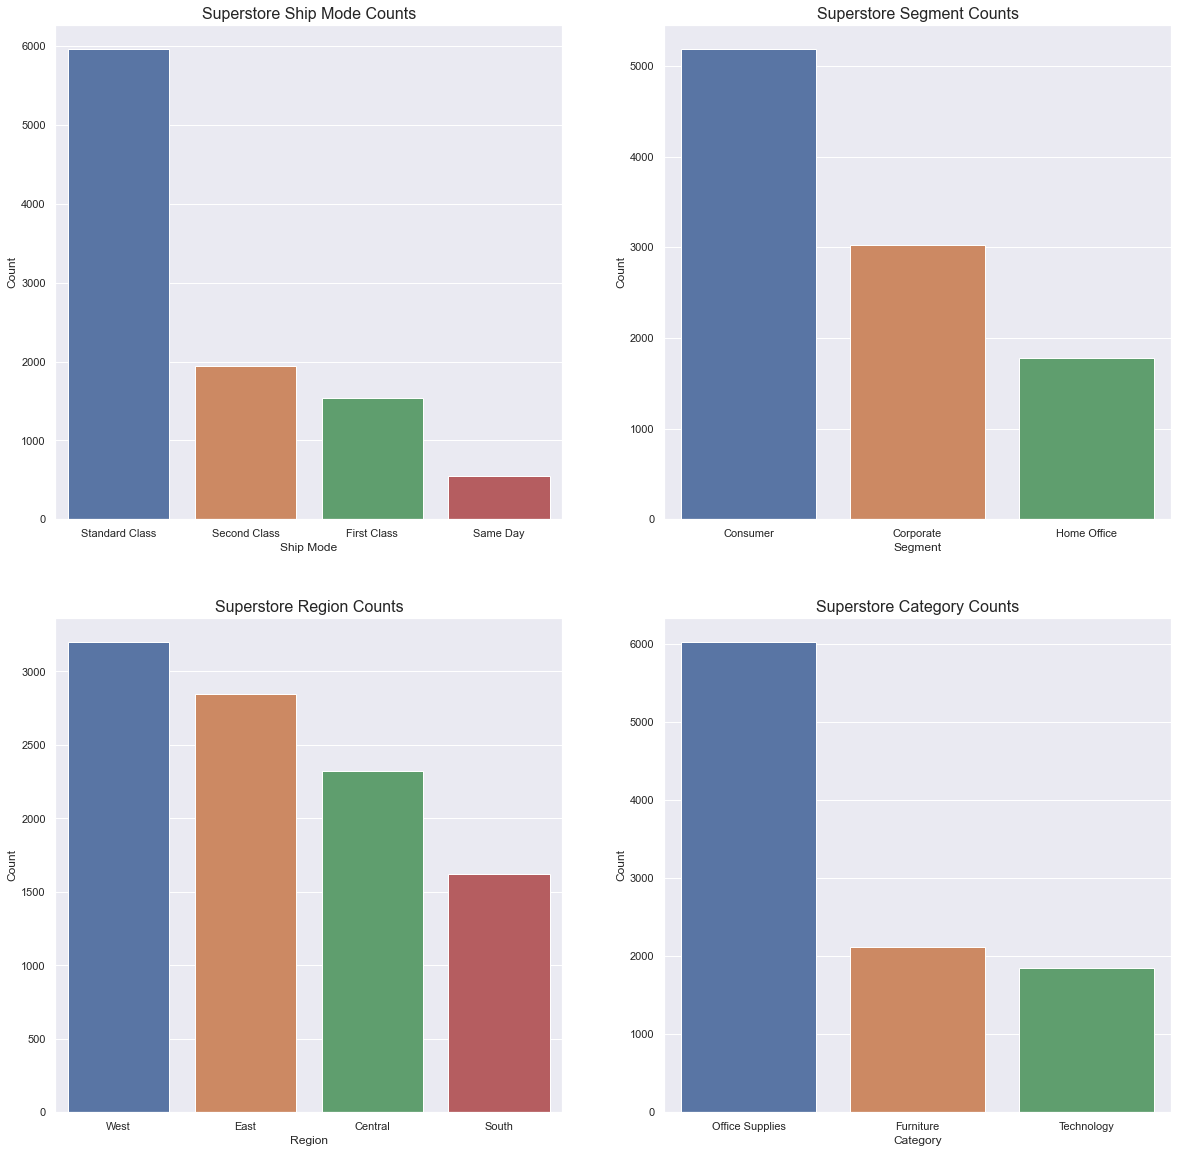

In [13]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Countplot of 'Ship Mode' feature
k1 = sns.countplot(data = superstore_df, x = 'Ship Mode', order = order_sssm.index, ax=ax0) # add to subplot 1
ax0.set_title('Superstore Ship Mode Counts', fontsize=16)
ax0.set(xlabel= 'Ship Mode', ylabel= 'Count')

# Subplot 2: Countplot of 'Segment' feature
k2 = sns.countplot(data = superstore_df, x = 'Segment', order = order_sssg.index, ax=ax1) # add to subplot 2           
ax1.set_title('Superstore Segment Counts', fontsize=16)
ax1.set(xlabel= 'Segment', ylabel= 'Count')

# Subplot 3: Countplot of 'Region' feature
k1 = sns.countplot(data = superstore_df, x = 'Region', order = order_ssr.index, ax=ax2) # add to subplot 3
ax2.set_title('Superstore Region Counts', fontsize=16)
ax2.set(xlabel= 'Region', ylabel= 'Count')

# Subplot 4: Countplot of 'Category' feature
k1 = sns.countplot(data = superstore_df, x = 'Category', order = order_ssc.index, ax=ax3) # add to subplot 4
ax3.set_title('Superstore Category Counts', fontsize=16)
ax3.set(xlabel= 'Category', ylabel= 'Count')

plt.show()

The observations from the above plots are:

<blockquote><ul>
<li>For the '<b>Ship Mode</b>' categorical feature, most of the data is accupied by '<span style="color: red">Stadard Class</span>' category which is <span style="color: red">5968</span>, while least of the data is accupied by '<span style="color: green">Same Day</span>' category which is <span style="color: green">543</span>.</li>
<li>For the '<b>Segment</b>' categorical feature, most of the data is accupied by '<span style="color: red">Consumer</span>' category which is <span style="color: red">5191</span>, while least of the data is accupied by '<span style="color: green">Home Office</span>' category which is <span style="color: green">1783</span>.</li>
<li>For the '<b>Region</b>' categorical feature, most of the data is accupied by '<span style="color: red">West</span>' category which is <span style="color: red">3203</span>, while least of the data is accupied by '<span style="color: green">South</span>' category which is <span style="color: green">1620</span>.</li>
<li>For the '<b>Category</b>' categorical feature, most of the data is accupied by '<span style="color: red">Office Supplies</span>' category which is <span style="color: red">6026</span>, while least of the data is accupied by '<span style="color: green">Technology</span>' category which is <span style="color: green">1847</span>.</li>
</ul>
</blockquote>

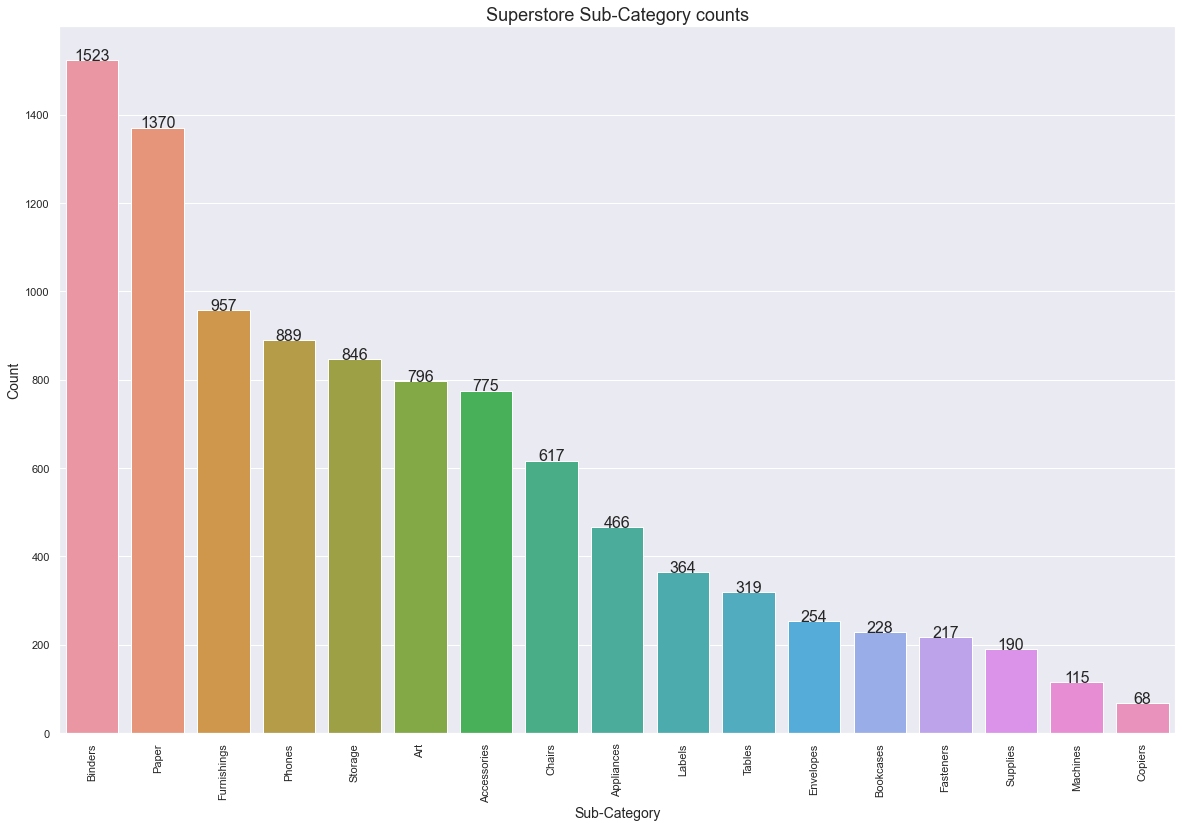

In [14]:
plt.figure(figsize=(20,13))
order_sc = superstore_df['Sub-Category'].value_counts()
sns.countplot(data = superstore_df, x = 'Sub-Category', order = order_sc.index)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.title('Superstore Sub-Category counts', fontsize=18)

for i in range(order_sc.shape[0]):
    count = order_sc[i]
    strt='{}'.format(count)
    plt.text(i,count+0.1,strt,ha='center', fontsize=16)

The observations from the above plot are:

<blockquote><ul>
<li>For the '<b>Sub-Category</b>' categorical feature, most of the data is accupied by '<span style="color: red">Binders</span>' category which is <span style="color: red">1523</span>, while least of the data is accupied by '<span style="color: green">Copies</span>' category which is <span style="color: green">68</span>.</li>
</ul>
</blockquote>

In [15]:
segment_sales = superstore_df[['Segment', 'Sales']].groupby(['Segment']).sum()
segment_sales

Sales
Segment                  
Consumer     1.161401e+06
Corporate    7.061464e+05
Home Office  4.296531e+05

In [16]:
# Let's create a function to plot 'Waffle Chart'
def create_waffle_chart(data= superstore_df[['Segment', 'Sales']].groupby(['Segment']).sum(), rows=10, 
                        values= segment_sales.to_numpy()/10000, title= 'waffle Chart', figsize= (10,10), 
                        bbox_to_anchor= (0, -0.1)):
    """
    This will take in a dataframe containing two featues which is grouped by one categorical variable as a feature  and 
    the aggrigation function taken on another continuous variable. Rest of the parameters are well set as default, 
    we can change the parameter values if we wish.
    """    
    #To plot the waffle Chart 
    fig = plt.figure(FigureClass = Waffle,
                     figsize= figsize,
                     rows = rows, 
                     values = values,
                     title={'label': title.upper(), 'loc': 'left'},
                     labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), 
                                                                                            (data.iloc[: , 0]/data.iloc[: , 0].sum()*100).to_numpy())],
                     legend={'loc': 'lower left', 'bbox_to_anchor': bbox_to_anchor, 'ncol': len(data), 'framealpha': 0})

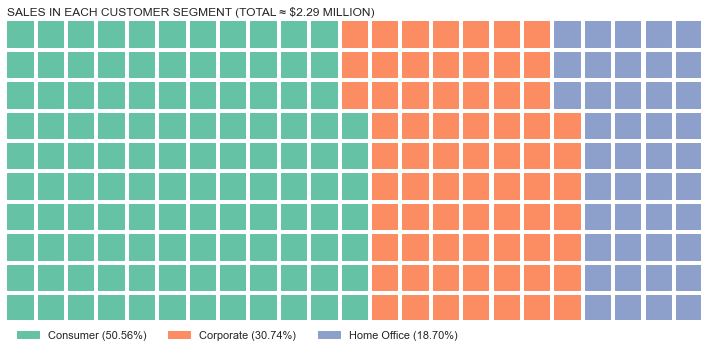

In [17]:
create_waffle_chart(data = segment_sales, title= 'Sales in Each Customer Segment (Total ≈ $2.29 million)')

Observations from the plot above-

<ul>
    <li>Around <b><span style="color: red">50%</span></b> of the total <code>'sales'</code> were made in the <b>consumer segment</b> which comprises of the individual buyers.</li>
    <li>The <b>Corporate sector and Home Office segments</b> have around <b><span style="color: green">31%</span></b> and <b><span style="color: green">19%</span></b> <code>'sales'</code> respectively.</li>
</ul>    

---
Now, let us analyze what percent of profits does each customer section makes for the supermarket.

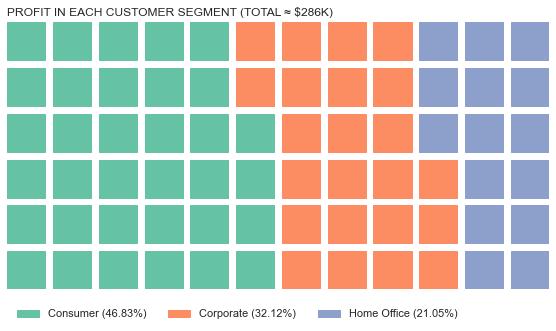

In [18]:
segment_profit = superstore_df[['Segment', 'Profit']].groupby(['Segment']).sum()
create_waffle_chart(data = segment_profit, figsize=(8, 8), rows = 6, values = segment_profit.to_numpy()/4000, \
                    bbox_to_anchor= (0, -0.15), title= 'Profit in Each Customer Segment (Total ≈ $286K)')

Some interesting observations here.
<ul>
    <li>While the <b>Consumer segment</b> had <b>more than 50%</b> in <b>sales</b>, its total contribution in the <b>profits</b> made by the company is <b>only around 46%</b>. This shows that the company is bearing a higher loss in the Consumer segment.</li>
    <li>The <b>Corporate and the Home Office segments</b> are returning more profits to the supermarket as compared to the sales made. While their <b>joint sales is around 50%</b>, thier <b>joint profits</b> made for the supermarket is <b>around 54%</b>.</li>
</ul>    

Here, the company can do two things in order to increase their profits. They can look into the reasons why they are bearing more losses in the consumer segment and try to reduce those losses, thus directly increasing the sales.

Other route the company can take is to providing more polished services to the Corporate and Home Office segments, thus driving them towards more profits.

In [19]:
# creating a column 'state_code'
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', \
              'Connecticut': 'CT', 'Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL', \
              'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD', \
              'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT', \
              'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY', \
              'North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA', \
              'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', \
              'Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV', \
              'Wisconsin': 'WI','Wyoming': 'WY'}

superstore_df['state_code'] = superstore_df['State'].apply(lambda x: state_code[x])

In [20]:
state_data = superstore_df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()
state_data.head()

Sales      Profit
state_code                         
AL           19510.6400   5786.8253
AR           11678.1300   4008.6871
AZ           35282.0010  -3427.9246
CA          457687.6315  76381.3871
CO           32108.1180  -6527.8579

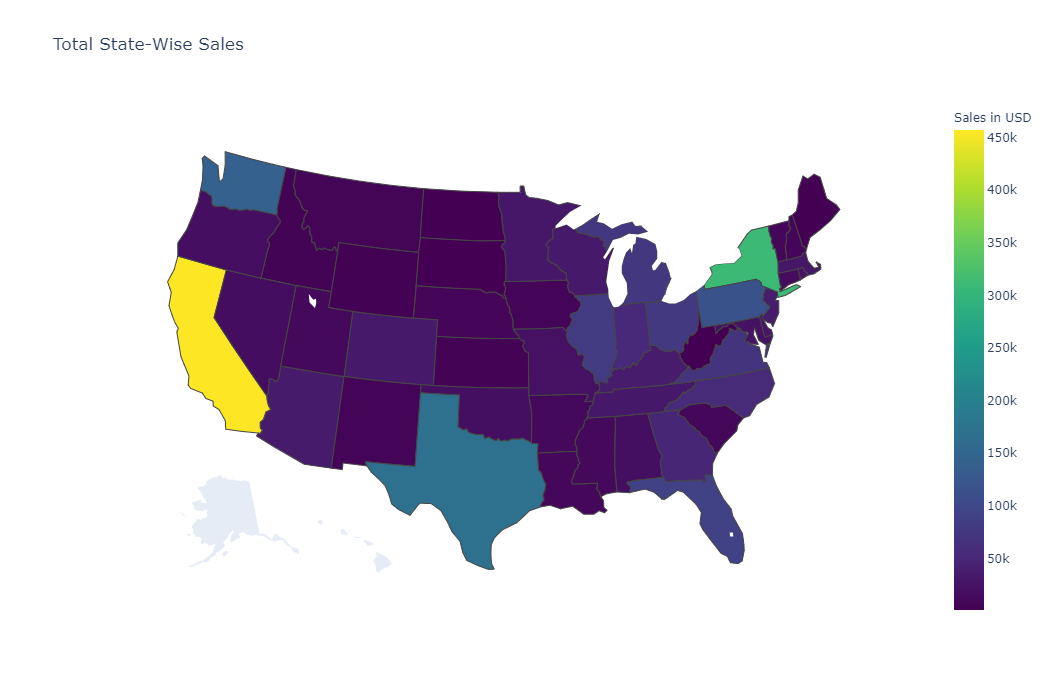

In [21]:
fig = go.Figure(data=go.Choropleth(locations= state_data.index, 
                                   z = state_data['Sales'], 
                                   locationmode = 'USA-states', 
                                   colorscale = 'Viridis',
                                   colorbar_title = 'Sales in USD')
               )

fig.update_layout(title_text = 'Total State-Wise Sales', geo_scope= 'usa', height=700)

fig.show()

Observations from the above given geographical plot-

<blockquote>
<ul>
<li>The company has <b>the highest sales</b> in the state of <b><span style="color: red">California</span></b> (shown in dark maroon), selling around <b><span style="color: red">USD 450K</span></b> of goods.</li>
<li><b><span style="color: blue">New York</span></b> (bright red, top right) is the state with <b>the second highest sales</b>, with more that <b><span style="color: blue">USD 300k</span></b> worth of goods sold.</li>
<li>The states of <b><span style="color: green">Texas</span></b> (bottommost, orange) and <b><span style="color: green">Washington</span></b> (top left, orange) end up <b>third and fourth on the top</b> sales charts with around <b><span style="color: green">USD 170K</span></b> and <b><span style="color: green">USD 140K</span></b> in sales respectively.</li>
<li>If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region. <b>In fact, the total sales in the state of New York is more than the sales in all of the Central America combined</b>.</li>
</ul>
</blockquote>

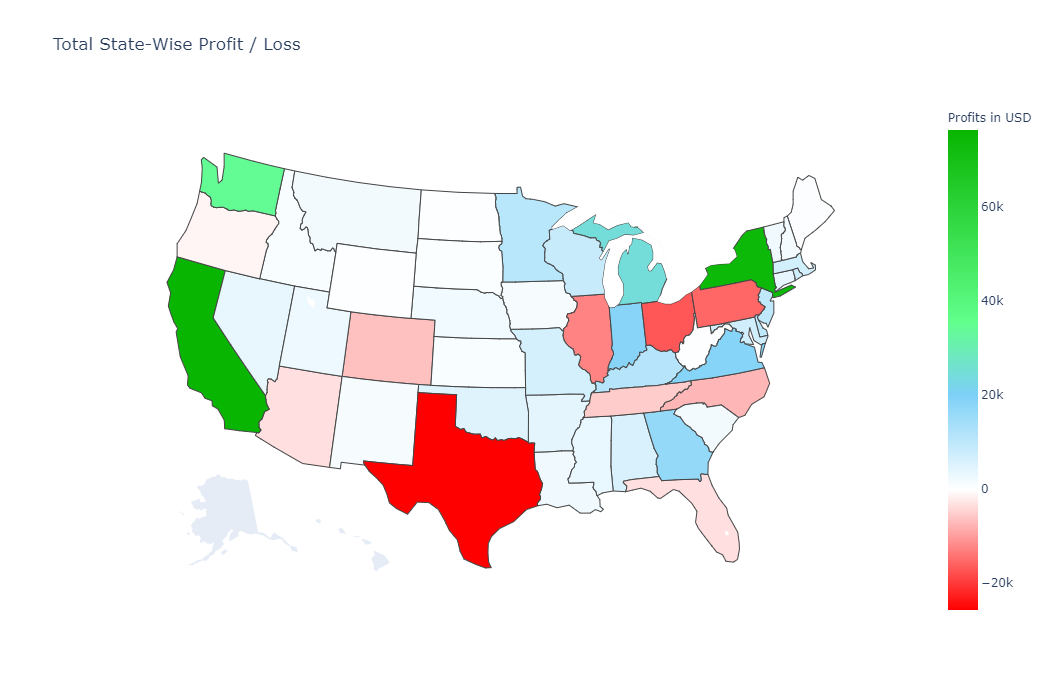

In [22]:
fig = go.Figure(data=go.Choropleth(locations= state_data.index, 
                                   z = state_data['Profit'], 
                                   locationmode = 'USA-states', 
                                   colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], 
                                                 [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
                                   colorbar_title = 'Profits in USD')
               )

fig.update_layout(title_text = 'Total State-Wise Profit / Loss', geo_scope= 'usa', height=700)

fig.show()

The observations from the above plot are:

<blockquote><ul>
<li>The states in shades of green, namely <b>New York, California and Washington</b> are the most profitable for the company, with <b>profits of over USD 30K</b>.</li>
<li>The states in teal and blue, with an average profit of around USD 25K are mostly situated in the north-east and south-east region.</li>
<li>The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around USD 25K.</li>
</ul>
</blockquote>

---


<h4>Now, let us have a look at the profit to sales ratio of each state. The profit-to-sales ratio tells us how much the store has to sell in that state in order to make profit.</h4>
<blockquote><UL>
<li>The higher the profit-to-sales ratio, the more profit returns the store gets in the state for each sale they make.</li>
<li>A lower ratio denotes that the store has to make a lot more sales in order to make the same amount of profit as compared to a state with a higher profit-to-sales ratio.</li>
<li>States with a negative profit-to-sales ratio denote a higher loss on each sale they make.</li>
</UL></blockquote>
These insights can help the supermarket in determining which state needs more attention as compared to the others.

In [23]:
# feature engineering price_to_sales ratio
state_data['profit_to_sales'] = state_data['Profit'] / state_data['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state_data['States'] = state_data.index
state_data['States'] = state_data.States.apply(lambda x: state_name[x])

# sorting the dataframe
state_data = state_data.sort_values(by = ['profit_to_sales'], ascending=True)
state_data.head(3)

Sales      Profit  profit_to_sales     States
state_code                                                   
OH          78258.136 -16971.3766        -0.216864       Ohio
CO          32108.118  -6527.8579        -0.203309   Colorado
TN          30661.873  -5341.6936        -0.174213  Tennessee

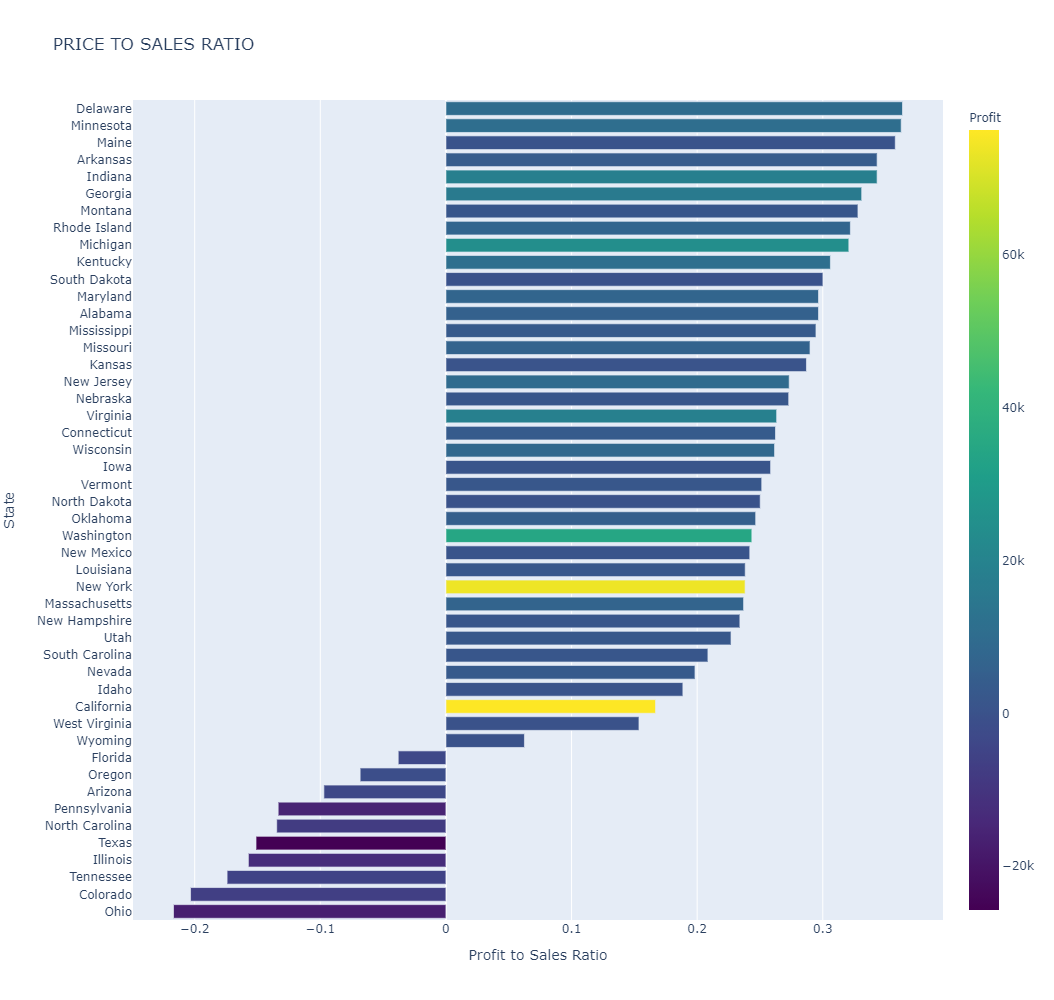

In [24]:
fig = px.bar(state_data, x = 'profit_to_sales', y = 'States', title = 'PRICE TO SALES RATIO',
             color = 'Profit', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(autosize=False, height=1000, 
                  xaxis = dict(tickmode = 'array', ticktext = state_data.States,
                               title='Profit to Sales Ratio'), 
                  yaxis=dict(title='State'))
fig.show()

Some interesting observations here:

<blockquote><UL>
<li>Ohio has the worst profit-to-sales ratio in terms of total sales and the losses beared.</li>
<li>Delaware has the highest profit-to-sales ratio.</li>
<li><b>The states making the largest profits for the company, namely New York, California and Washington DC don't have the highest profit-to-sales ratio. This means that the company can further improve its sales/profits in these states.</b></li>
</UL></blockquote>

<h4>Profit per Category - Sub Category</h4>
Let us have a look at the performance of each sub category.

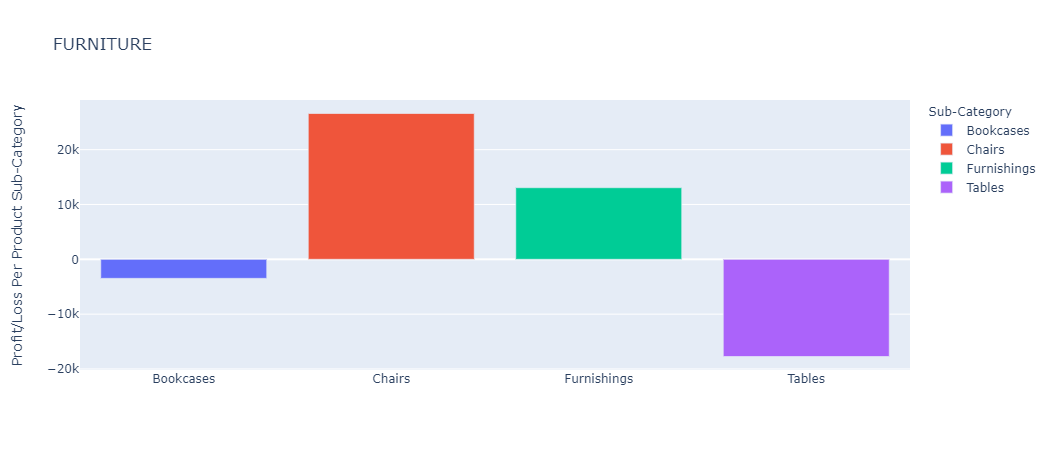

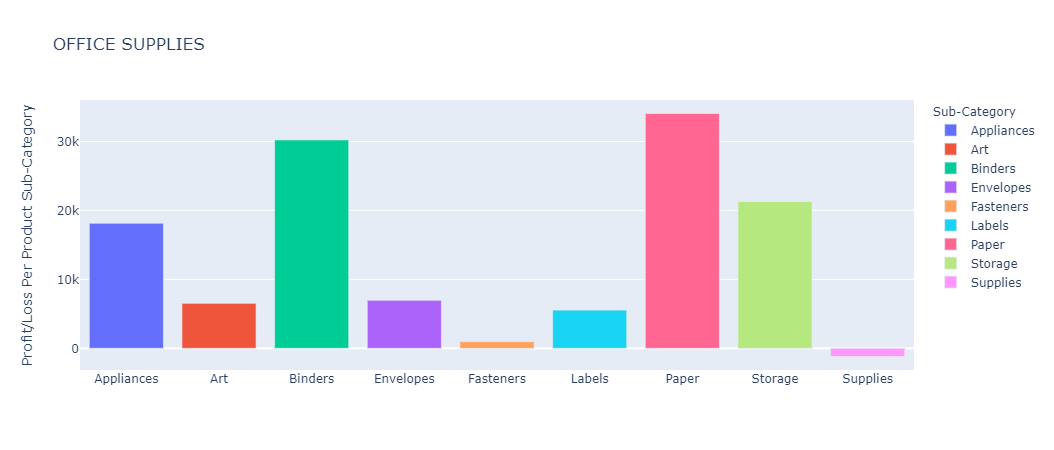

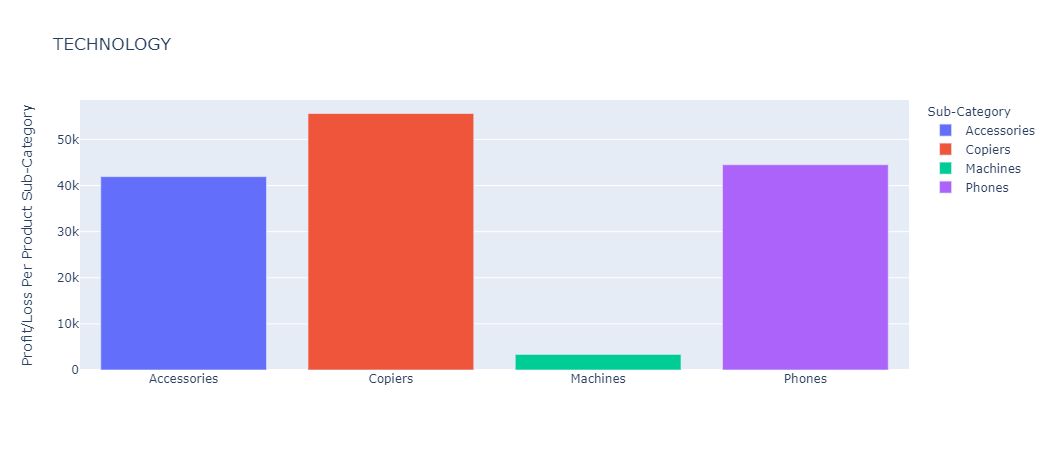

In [25]:
data_cat = superstore_df.groupby(['Category'])

for cat, df in data_cat:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

From the above given plots, it is clear that-

<blockquote><ul>
<li>'Tables' and 'Bookcases' are the businesses where the company is losing most of its money.</li>
<li>While the technology business is making most of the profits for the company, the machines business makes the least profit. The superstore can improve in that sub-category.</li>
<li>Considering the combined turnover from each category, the furniture business is where the company is barely making any considerable profit. May be the shipping modes and shipping costs for the furniture products, which are usually large, has something to do with the low profits/high losses.</li>
</ul></blockquote>

---

<h4>Let us have a look at what role the various shipping modes has to play in all this.</h4><br>
First, let us have a look at which shipping method different consumer segments use the most for buying products in different product categories.

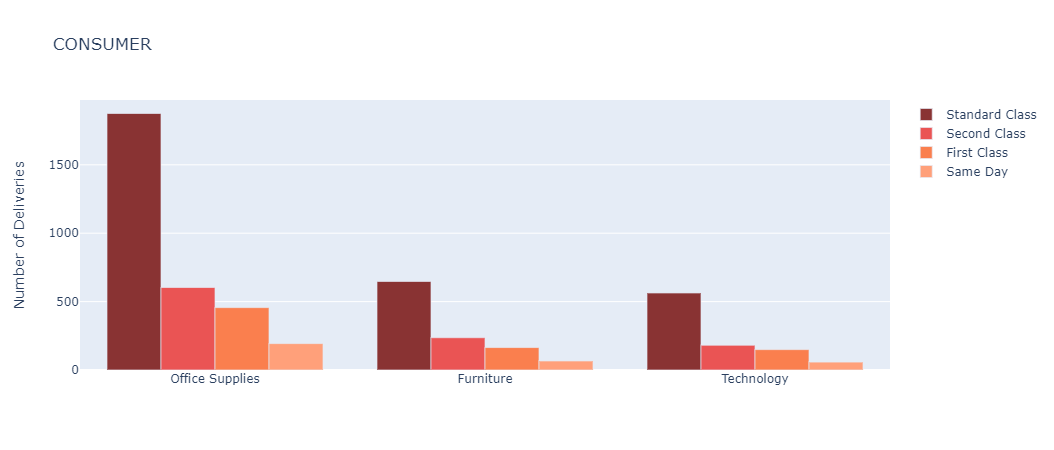

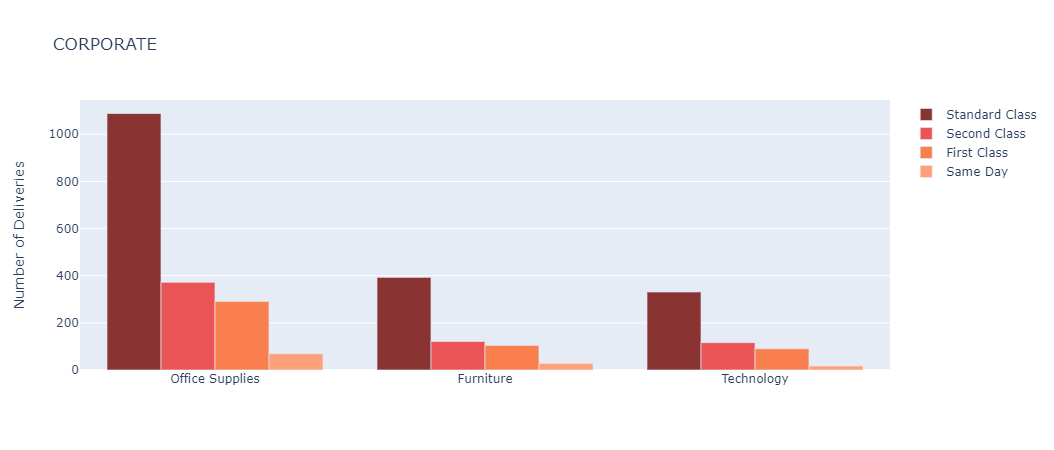

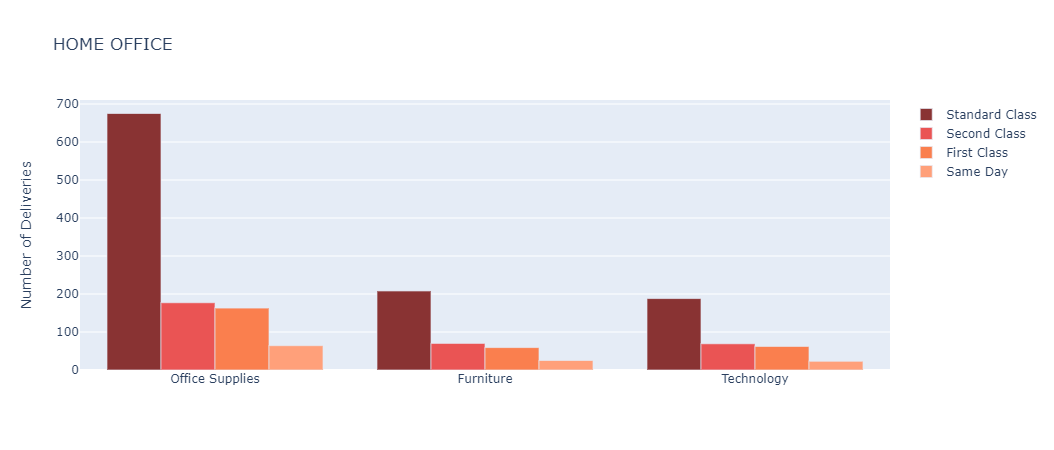

In [26]:
ship_segment = superstore_df.groupby(['Segment'])
segment_list = superstore_df.Segment.value_counts().index
cat_list = superstore_df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list, y = standard, name='Standard Class', marker_color='rgb(137,51,51)'))
    
    fig.add_trace(go.Bar(x = cat_list, y = second, name='Second Class', marker_color='rgb(234,84,84)'))
    
    fig.add_trace(go.Bar(x = cat_list, y = first, name='First Class', marker_color='rgb(250,127,78)'))
    
    fig.add_trace(go.Bar(x = cat_list, y = same, name='Same Day', marker_color='lightsalmon'))
    
    fig.update_layout(barmode ='group',
                      width = 800,
                      title = segment.upper(),
                      yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

Observations from the above given plot-

<blockquote><ul>
<li>Standard class shipping is the most used shipping method across all consumer segments and product categories.</li>
<li>Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.</li>
</ul></blockquote>

---

Now, let us consider <h4>how much loss each shipping category bears</h4>

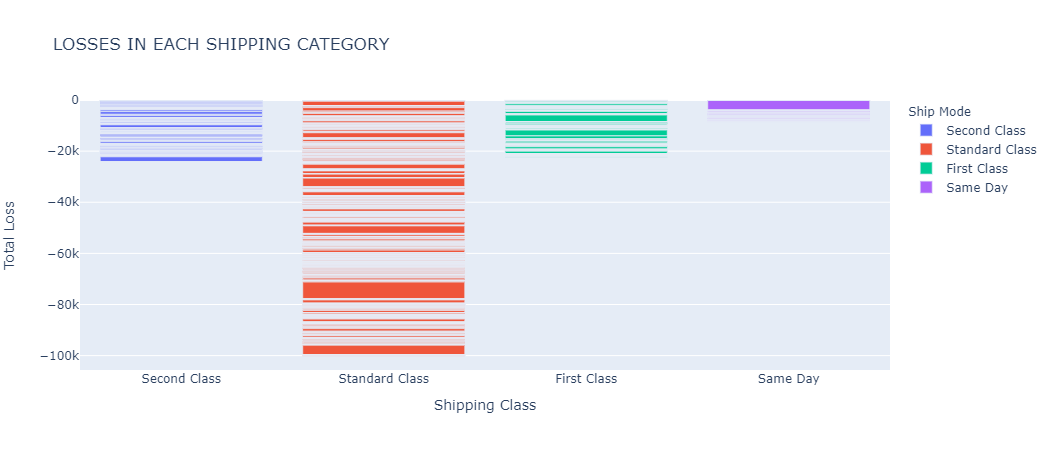

In [27]:
superstore_df['loss'] = superstore_df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar(superstore_df, x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), \
             color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])

fig.update_layout(autosize = True, width = 600, yaxis = dict(title='Total Loss'), \
                  xaxis = dict(title='Shipping Class'))
fig.show()

Observations from the plot above-
<blockquote><ul>
<li>The <b>highest loss</b> beared by the company was while delivering products via the <b>standard class shipping</b>. This is of no surprise, since most products were delivered using standard shipping. However, one important thing to be noted is that some of the biggest losses beared by the superstore also fall under the standard shipping category, one going <b>as high as \$6,600 in a single sale</b>.</li>
<li>First and second class shipping have almost equal losses. This is also no surprise since the number of sales shipped under each shipping category were also almost equal.</li>
<ul></blockquote>
Apart from this information, it doesn't seem that shipping has a major effect on profits or losses as such.

---

<h4>Now, for the last part of our EDA section, we will see how discounts affect the sale of products and the revenue generated by it.</h4>

In [28]:
superstore_df['price_per_product'] = superstore_df.Sales / superstore_df.Quantity

superstore_df['whether_discount'] = superstore_df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = superstore_df.groupby(['whether_discount']).mean()

def discount_graphs(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = superstore_df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = superstore_df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    
    fig.add_trace(go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color), row=1, col=1)
    
    fig.add_trace(go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color), row=1, col=2)

    fig.add_trace(go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),row=1, col=3)
    
    fig.update_layout(showlegend=False)
    fig.show()

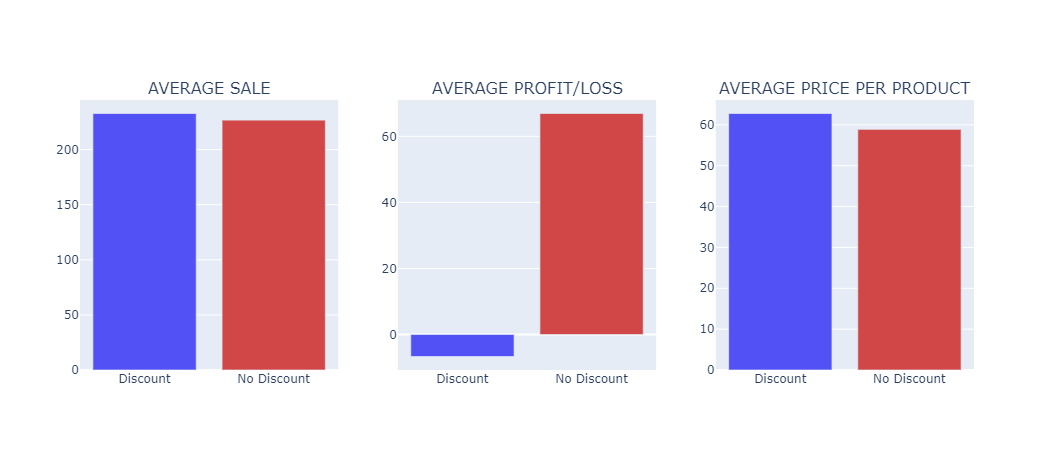

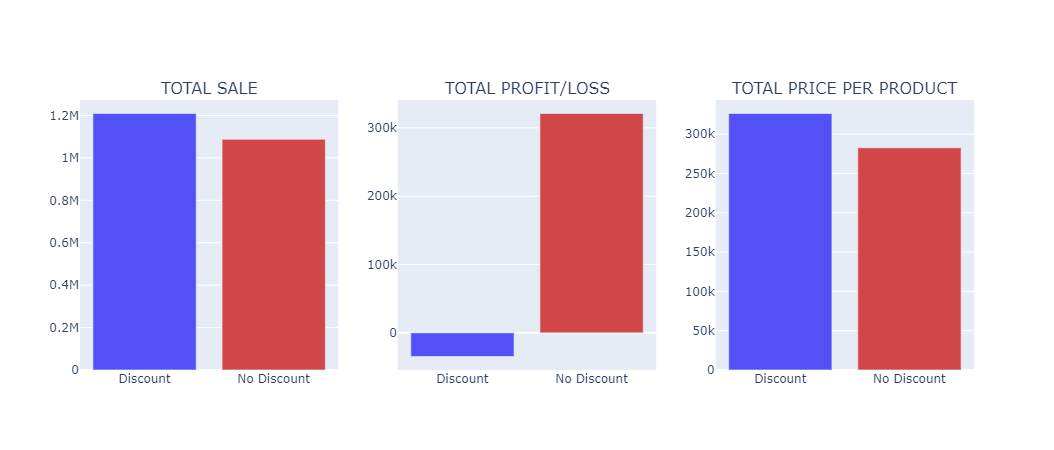

In [29]:
discount_graphs('average')
discount_graphs()

Observations from the above given plots-

<blockquote><ul>
<li>Considering both average and total sales, it seems that <b>people tend to buy more things when it is selling at a discounted price</b>. <b><span style="color: blue">An average sale at discounted price</span><b> is of around <b><span style="color: blue">USD 232</span></b> as compared to <b><span style="color: red">USD 226 on undiscounted price</span></b>.</li>
<li>On an average, a <b><span style="color: blue">discounted sale results in a loss of around USD 6</span></b> as compared to around <b><span style="color: red">USD 66 in profit on a non-discounted sale</span></b>. Also, the company made a total <b><span style="color: red">profit of around USD 320K on non-discount sales</span></b>, as compared to a <b><span style="color: blue">loss of around USD 34K on discounted sales</span></b>.</li>
<li>The <b><span style="color: blue">average price of a discounted</span></b> product is around <b><span style="color: blue">USD 62</span></b>, while the same is around <b><span style="color: red">USD 58 for a non-discounted</span></b> item.</li>
</ul></blockquote>

---
One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.

# Thank you!